# Worldwide Profit vs Release Year and Release Month 

In [1]:
import pandas as pd

# Movie Budgets

In [2]:
#chart 6

MB = pd.read_csv("zippedData/tn.movie_budgets.csv")
MB.head(3)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"


In [3]:
#chart 5

TM = pd.read_csv("zippedData/tmdb.movies.csv")
TM.head(3)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368


In [4]:
#merging tables
joined_df_5_6 = pd.merge(MB, TM, 
                        left_on = 'movie',
                        right_on = 'original_title')

joined_df_5_6.head(3)

#specifically looking at 3 financial cols at the end VS studio col

,id_x,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,Unnamed: 0,genre_ids,id_y,original_language,original_title,popularity,release_date_y,title,vote_average,vote_count
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2470,"[12, 28, 14]",1865,en,Pirates of the Caribbean: On Stranger Tides,30.579,2011-05-20,Pirates of the Caribbean: On Stranger Tides,6.4,8571
2,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",14169,"[28, 12, 878]",99861,en,Avengers: Age of Ultron,44.383,2015-05-01,Avengers: Age of Ultron,7.3,13457


In [5]:
joined_df_5_6.isna().sum()

id_x                 0
release_date_x       0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
Unnamed: 0           0
genre_ids            0
id_y                 0
original_language    0
original_title       0
popularity           0
release_date_y       0
title                0
vote_average         0
vote_count           0
dtype: int64

In [6]:
#specifically looking at 3 financial cols at the end VS studio col

#take out $ and commas with replace function so we can only have int's

joined_df_5_6['production_budget'] = joined_df_5_6['production_budget'].apply(lambda x: x.replace('$',''))
joined_df_5_6['worldwide_gross'] = joined_df_5_6['worldwide_gross'].apply(lambda x: x.replace(',',''))

joined_df_5_6['domestic_gross'] = joined_df_5_6['domestic_gross'].apply(lambda x: x.replace('$',''))
joined_df_5_6['domestic_gross'] = joined_df_5_6['domestic_gross'].apply(lambda x: x.replace(',',''))

joined_df_5_6['worldwide_gross'] = joined_df_5_6['worldwide_gross'].apply(lambda x: x.replace('$',''))
joined_df_5_6['production_budget'] = joined_df_5_6['production_budget'].apply(lambda x: x.replace(',',''))

joined_df_5_6.head(3)

,id_x,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,Unnamed: 0,genre_ids,id_y,original_language,original_title,popularity,release_date_y,title,vote_average,vote_count
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2470,"[12, 28, 14]",1865,en,Pirates of the Caribbean: On Stranger Tides,30.579,2011-05-20,Pirates of the Caribbean: On Stranger Tides,6.4,8571
2,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,14169,"[28, 12, 878]",99861,en,Avengers: Age of Ultron,44.383,2015-05-01,Avengers: Age of Ultron,7.3,13457


In [7]:
#convert strings to int's (can't work with str's to do numerical analysis)

joined_df_5_6['production_budget'] = joined_df_5_6.production_budget.apply(lambda x: int(x))

joined_df_5_6['worldwide_gross'] = joined_df_5_6.worldwide_gross.apply(lambda x: int(x))

joined_df_5_6['domestic_gross'] = joined_df_5_6.worldwide_gross.apply(lambda x: int(x))

joined_df_5_6.head(3)

,id_x,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,Unnamed: 0,genre_ids,id_y,original_language,original_title,popularity,release_date_y,title,vote_average,vote_count
0,1,"Dec 18, 2009",Avatar,425000000,2776345279,2776345279,6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,1045663875,1045663875,2470,"[12, 28, 14]",1865,en,Pirates of the Caribbean: On Stranger Tides,30.579,2011-05-20,Pirates of the Caribbean: On Stranger Tides,6.4,8571
2,4,"May 1, 2015",Avengers: Age of Ultron,330600000,1403013963,1403013963,14169,"[28, 12, 878]",99861,en,Avengers: Age of Ultron,44.383,2015-05-01,Avengers: Age of Ultron,7.3,13457


In [8]:
joined_df_5_6['domestic_profit']= joined_df_5_6['domestic_gross'] - joined_df_5_6['production_budget']

joined_df_5_6['worldwide_profit'] = joined_df_5_6['worldwide_gross'] - joined_df_5_6['production_budget']

joined_df_5_6.head(3)

#did the math and added 2 profit columns to the end 

,id_x,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,Unnamed: 0,genre_ids,id_y,original_language,original_title,popularity,release_date_y,title,vote_average,vote_count,domestic_profit,worldwide_profit
0,1,"Dec 18, 2009",Avatar,425000000,2776345279,2776345279,6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676,2351345279,2351345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,1045663875,1045663875,2470,"[12, 28, 14]",1865,en,Pirates of the Caribbean: On Stranger Tides,30.579,2011-05-20,Pirates of the Caribbean: On Stranger Tides,6.4,8571,635063875,635063875
2,4,"May 1, 2015",Avengers: Age of Ultron,330600000,1403013963,1403013963,14169,"[28, 12, 878]",99861,en,Avengers: Age of Ultron,44.383,2015-05-01,Avengers: Age of Ultron,7.3,13457,1072413963,1072413963


In [9]:
joined_df_5_6['popularity'] = joined_df_5_6.popularity.apply(lambda x: int(x))

joined_df_5_6.head(3)

#converted popularity from float to int

,id_x,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,Unnamed: 0,genre_ids,id_y,original_language,original_title,popularity,release_date_y,title,vote_average,vote_count,domestic_profit,worldwide_profit
0,1,"Dec 18, 2009",Avatar,425000000,2776345279,2776345279,6,"[28, 12, 14, 878]",19995,en,Avatar,26,2009-12-18,Avatar,7.4,18676,2351345279,2351345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,1045663875,1045663875,2470,"[12, 28, 14]",1865,en,Pirates of the Caribbean: On Stranger Tides,30,2011-05-20,Pirates of the Caribbean: On Stranger Tides,6.4,8571,635063875,635063875
2,4,"May 1, 2015",Avengers: Age of Ultron,330600000,1403013963,1403013963,14169,"[28, 12, 878]",99861,en,Avengers: Age of Ultron,44,2015-05-01,Avengers: Age of Ultron,7.3,13457,1072413963,1072413963


In [10]:
#now make 2 graphs...1 for domestic profit vs popularity AND 
#worldwide profit vs popularity 

In [11]:
joined_df_5_6['release_date_x'] = joined_df_5_6.release_date_x.apply(lambda x: int(x[7:]))  #only putting the year

joined_df_5_6.head(3)

# filter rows for year 2002 using  the boolean expression
#joined_df_5_6[joined_df_5_6['year']==]

#joined_df_5_6 = joined_df_5_6.loc[joined_df_5_6['release_date_x'].dt.month.between(1956, 2019)]
                  

,id_x,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,Unnamed: 0,genre_ids,id_y,original_language,original_title,popularity,release_date_y,title,vote_average,vote_count,domestic_profit,worldwide_profit
0,1,2009,Avatar,425000000,2776345279,2776345279,6,"[28, 12, 14, 878]",19995,en,Avatar,26,2009-12-18,Avatar,7.4,18676,2351345279,2351345279
1,2,2011,Pirates of the Caribbean: On Stranger Tides,410600000,1045663875,1045663875,2470,"[12, 28, 14]",1865,en,Pirates of the Caribbean: On Stranger Tides,30,2011-05-20,Pirates of the Caribbean: On Stranger Tides,6.4,8571,635063875,635063875
2,4,2015,Avengers: Age of Ultron,330600000,1403013963,1403013963,14169,"[28, 12, 878]",99861,en,Avengers: Age of Ultron,44,2015-05-01,Avengers: Age of Ultron,7.3,13457,1072413963,1072413963


In [60]:
release_date_gross = joined_df_5_6[["release_date_x", "worldwide_profit"]]
profit = release_date_gross.loc[release_date_gross.release_date_x > 1986]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, '1987'),
  Text(1, 0, '1988'),
  Text(2, 0, '1989'),
  Text(3, 0, '1990'),
  Text(4, 0, '1991'),
  Text(5, 0, '1992'),
  Text(6, 0, '1993'),
  Text(7, 0, '1994'),
  Text(8, 0, '1995'),
  Text(9, 0, '1996'),
  Text(10, 0, '1997'),
  Text(11, 0, '1998'),
  Text(12, 0, '1999'),
  Text(13, 0, '2000'),
  Text(14, 0, '2001'),
  Text(15, 0, '2002'),
  Text(16, 0, '2003'),
  Text(17, 0, '2004'),
  Text(18, 0, '2005'),
  Text(19, 0, '2006'),
  Text(20, 0, '2007'),
  Text(21, 0, '2008'),
  Text(22, 0, '2009'),
  Text(23, 0, '2010'),
  Text(24, 0, '2011'),
  Text(25, 0, '2012'),
  Text(26, 0, '2013'),
  Text(27, 0, '2014'),
  Text(28, 0, '2015'),
  Text(29, 0, '2016'),
  Text(30, 0, '2017'),
  Text(31, 0, '2018'),
  Text(32, 0, '2019')])

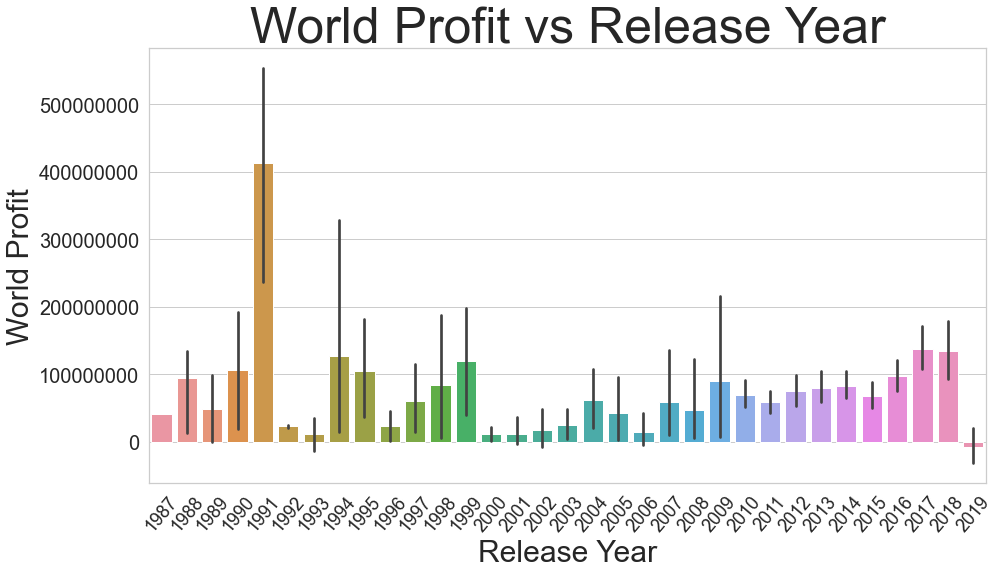

In [69]:
import seaborn as sns
from matplotlib import pyplot as plt

plt.figure(figsize=(15,8))
plt.xticks(rotation = 50)

ax = sns.barplot(x="release_date_x", y="worldwide_profit", data=profit)

ax.set_xlabel("Release Year", fontsize = 30)  #labels the axes
ax.set_ylabel("World Profit", fontsize =30)
ax.set_title('World Profit vs Release Year', fontsize = 50)
ax.ticklabel_format(style='plain', axis='y')  #fixes scientific notation issue
plt.yticks(fontsize=20)
plt.xticks(fontsize=18)


In [70]:
#year vs worldwide gross

import matplotlib.pyplot as plt
import seaborn as sns

fig , ax = plt.subplots(figsize= (30,30))
#ax.set_title('Year vs Worldwide Gross')
sns.set(font_scale = 3)
sns.barplot(x = 'release_date_x' ,y = 'worldwide_profit',data = joined_df_5_6.groupby('release_date_x').mean().sort_values(by = 'worldwide_profit').reset_index())
#sns_plot = sns.lineplot(color='blue', linewidth=2.5)
plt.xticks(rotation = 40)      #makes the x axis more vertical
ax.set_xlabel("Release Year", fontsize = 70)  #labels the axes
ax.set_ylabel("World Profit", fontsize =70)
ax.set_title('World Profit vs Year', fontsize = 80, #xlim=["1959", "2019"])
plt.yticks(fontsize=40)
#plt.xticks(fontsize=15)

#%Y - 4 digit year with upper case Y
#date_form = DateFormatter("%Y")
#ax.xaxis.set_major_formatter(date_form)

#ax.ticklabel_format(style='plain', axis='y')  #fixes scientific notation issue

plt.show()

SyntaxError: invalid syntax (<ipython-input-70-598d461bdd31>, line 24)

In [71]:
#year vs worldwide gross

import matplotlib.pyplot as plt
import seaborn as sns

fig , ax = plt.subplots(figsize= (30,30))
#ax.set_title('Year vs Worldwide Gross')
sns.set(font_scale = 3)
sns.barplot(x = 'release_date_x' ,y = 'worldwide_profit', data = joined_df_5_6
            #sns_plot = sns.lineplot(color='blue', linewidth=2.5)
#plt.xticks(rotation = 40)      #makes the x axis more vertical
ax.set_xlabel("Release Year", fontsize = 70)  #labels the axes
ax.set_ylabel("World Profit", fontsize =70)
ax.set_title('World Profit vs Year', fontsize = 80, #xlim=["1959", "2019"])
plt.yticks(fontsize=40)
#plt.xticks(fontsize=15)

#%Y - 4 digit year with upper case Y
#date_form = DateFormatter("%Y")
#ax.xaxis.set_major_formatter(date_form)

#ax.ticklabel_format(style='plain', axis='y')  #fixes scientific notation issue

plt.show()

SyntaxError: invalid syntax (<ipython-input-71-fe705418473f>, line 12)

In [72]:
joined_df_5_6

,id_x,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,Unnamed: 0,genre_ids,id_y,original_language,original_title,popularity,release_date_y,title,vote_average,vote_count,domestic_profit,worldwide_profit
0,1,2009,Avatar,425000000,2776345279,2776345279,6,"[28, 12, 14, 878]",19995,en,Avatar,26,2009-12-18,Avatar,7.4,18676,2351345279,2351345279
1,2,2011,Pirates of the Caribbean: On Stranger Tides,410600000,1045663875,1045663875,2470,"[12, 28, 14]",1865,en,Pirates of the Caribbean: On Stranger Tides,30,2011-05-20,Pirates of the Caribbean: On Stranger Tides,6.4,8571,635063875,635063875
2,4,2015,Avengers: Age of Ultron,330600000,1403013963,1403013963,14169,"[28, 12, 878]",99861,en,Avengers: Age of Ultron,44,2015-05-01,Avengers: Age of Ultron,7.3,13457,1072413963,1072413963
3,7,2018,Avengers: Infinity War,300000000,2048134200,2048134200,23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80,2018-04-27,Avengers: Infinity War,8.3,13948,1748134200,1748134200
4,9,2017,Justice League,300000000,655945209,655945209,20623,"[28, 12, 14, 878]",141052,en,Justice League,34,2017-11-17,Justice League,6.2,7510,355945209,355945209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2311,49,2015,Exeter,25000,489792,489792,14678,"[53, 27]",226458,en,Exeter,5,2015-03-26,Exeter,4.7,121,464792,464792
2312,51,2015,Ten,25000,0,0,12326,"[12, 27, 9648, 53]",279516,en,Ten,1,2014-03-28,Ten,5.4,5,-25000,-25000
2313,54,2014,Dry Spell,22000,0,0,10470,"[35, 10749]",255266,en,Dry Spell,0,2013-02-14,Dry Spell,6.0,1,-22000,-22000
2314,56,2013,All Superheroes Must Die,20000,0,0,8893,"[878, 53]",86304,en,All Superheroes Must Die,2,2013-01-04,All Superheroes Must Die,3.9,19,-20000,-20000


In [73]:
#convert string to datetime object for the month 
#joined_df_5_6['release_date_x'] = joined_df_5_6.release_date_x.apply(lambda x: to_datetime(x))

#convert dates to month only

joined_df_5_6.head(3)

joined_df_5_6["date"] = pd.to_datetime(joined_df_5_6.release_date_y)

joined_df_5_6
month =  {'01':'January','02':'February',
    '03':'March',
    '04':'April',
    '05':'May',
    '06':'June',
    '07':'July',
    '08':'August',
    '09':'September',
    '10':'October',
    '11':'November', 
    '12':'December'}
#split it by month

joined_df_5_6['Months'] = joined_df_5_6.release_date_y.apply(lambda x: x.split('-')[1])

joined_df_5_6

,id_x,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,Unnamed: 0,genre_ids,id_y,original_language,original_title,popularity,release_date_y,title,vote_average,vote_count,domestic_profit,worldwide_profit,date,Months
0,1,2009,Avatar,425000000,2776345279,2776345279,6,"[28, 12, 14, 878]",19995,en,Avatar,26,2009-12-18,Avatar,7.4,18676,2351345279,2351345279,2009-12-18,12
1,2,2011,Pirates of the Caribbean: On Stranger Tides,410600000,1045663875,1045663875,2470,"[12, 28, 14]",1865,en,Pirates of the Caribbean: On Stranger Tides,30,2011-05-20,Pirates of the Caribbean: On Stranger Tides,6.4,8571,635063875,635063875,2011-05-20,05
2,4,2015,Avengers: Age of Ultron,330600000,1403013963,1403013963,14169,"[28, 12, 878]",99861,en,Avengers: Age of Ultron,44,2015-05-01,Avengers: Age of Ultron,7.3,13457,1072413963,1072413963,2015-05-01,05
3,7,2018,Avengers: Infinity War,300000000,2048134200,2048134200,23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80,2018-04-27,Avengers: Infinity War,8.3,13948,1748134200,1748134200,2018-04-27,04
4,9,2017,Justice League,300000000,655945209,655945209,20623,"[28, 12, 14, 878]",141052,en,Justice League,34,2017-11-17,Justice League,6.2,7510,355945209,355945209,2017-11-17,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2311,49,2015,Exeter,25000,489792,489792,14678,"[53, 27]",226458,en,Exeter,5,2015-03-26,Exeter,4.7,121,464792,464792,2015-03-26,03
2312,51,2015,Ten,25000,0,0,12326,"[12, 27, 9648, 53]",279516,en,Ten,1,2014-03-28,Ten,5.4,5,-25000,-25000,2014-03-28,03
2313,54,2014,Dry Spell,22000,0,0,10470,"[35, 10749]",255266,en,Dry Spell,0,2013-02-14,Dry Spell,6.0,1,-22000,-22000,2013-02-14,02
2314,56,2013,All Superheroes Must Die,20000,0,0,8893,"[878, 53]",86304,en,All Superheroes Must Die,2,2013-01-04,All Superheroes Must Die,3.9,19,-20000,-20000,2013-01-04,01


In [74]:
plotdata = joined_df_5_6.sort_values(by='Months')
plotdata = plotdata.groupby(['Months'])[['worldwide_profit']].sum()

#sorting by months, grouping by months and worldwide profit

In [75]:
plotdata.index = ['January','February','March','April','May','June','July','August','September','October','November','December']

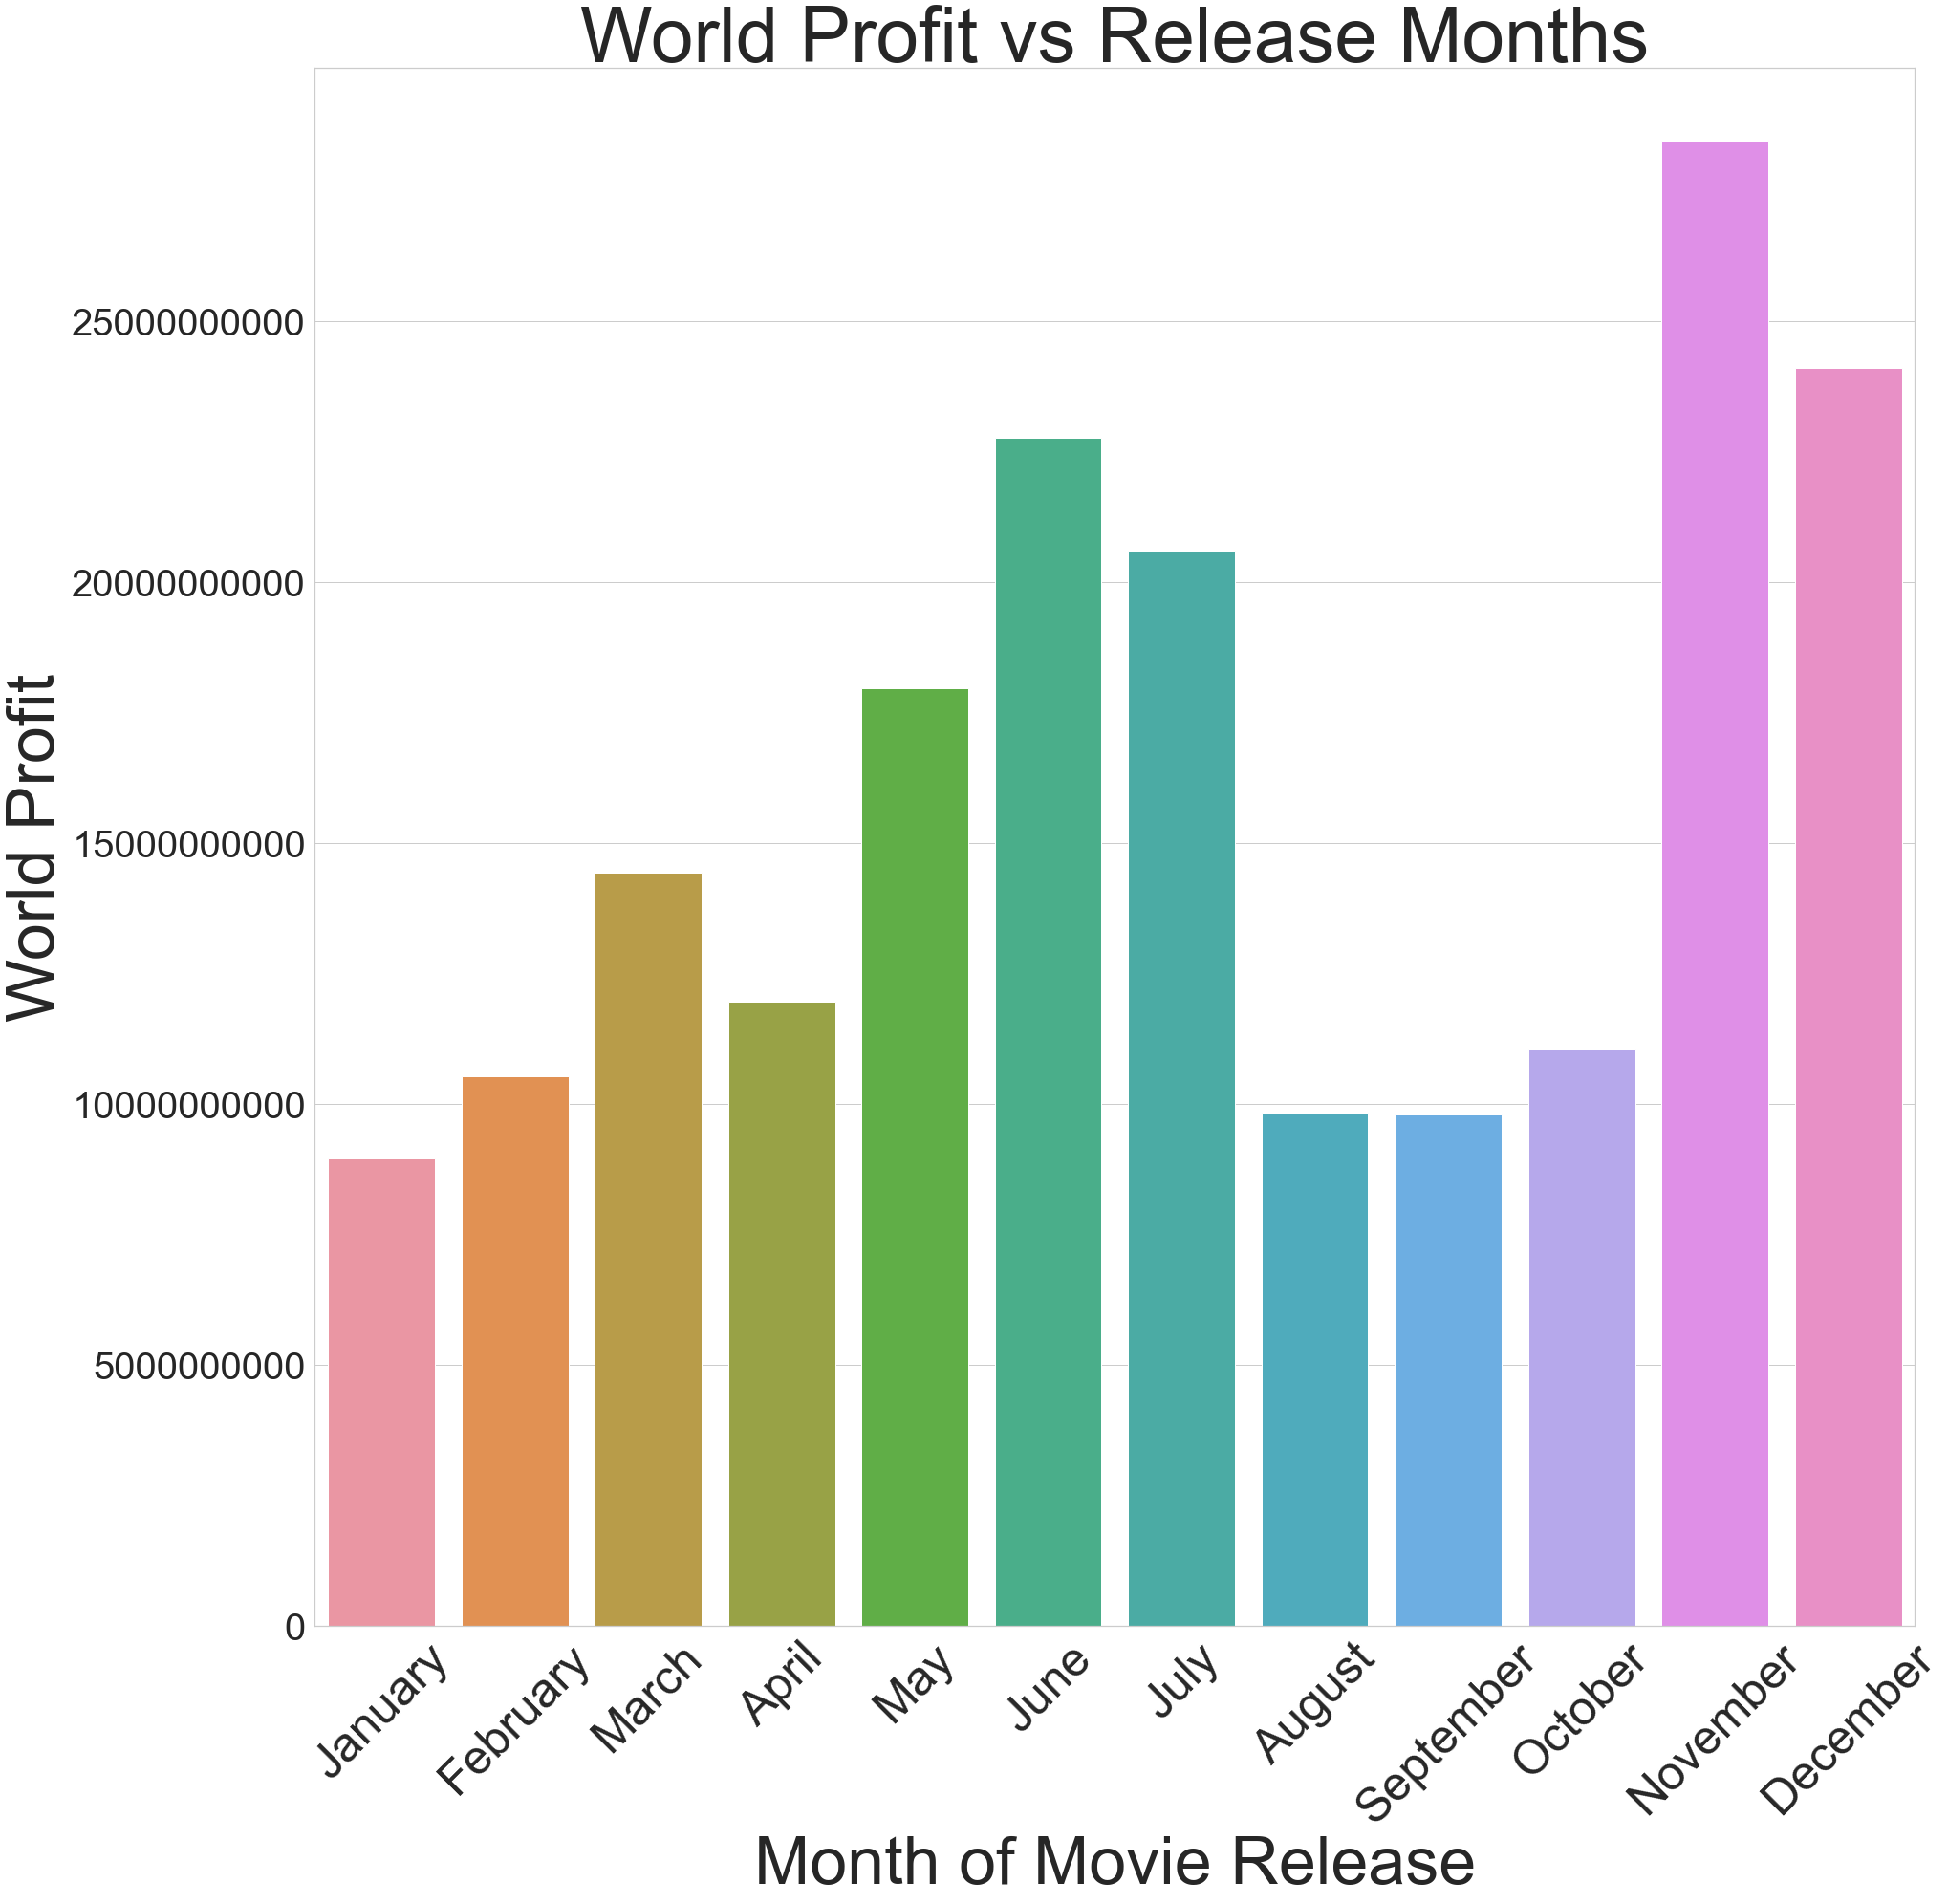

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

fig ,ax = plt.subplots(figsize= (30,30))
#ax.set_title('Year vs Worldwide Gross')
sns.set(font_scale = 3)

sns.barplot(x = list(plotdata.index) ,y = 'worldwide_profit',data = plotdata)
#sns_plot = sns.lineplot(color='blue', linewidth=2.5)
plt.xticks(rotation = 45)      #makes the x xis more vertical
ax.set_xlabel("Month of Movie Release", fontsize = 70)  #labels the axes
ax.set_ylabel("World Profit", fontsize =70)
ax.set_title('World Profit vs Release Months', fontsize = 80)

plt.yticks(fontsize=40)
plt.xticks(fontsize=50)

ax.ticklabel_format(style='plain', axis='y')  #fixes scientific notation issue

plt.show()